In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import h5py
import datetime
import scipy.signal as sig
import peakutils
import Alexsdatafuncs
datman = Alexsdatafuncs.data_manipulators()
alexplot = Alexsdatafuncs.plotting_funcs()
from lmfit.models import GaussianModel
import matplotlib.image as mpimg
from PIL import Image
import despike

In [2]:
reload(Alexsdatafuncs)
datman = Alexsdatafuncs.data_manipulators()
alexplot = Alexsdatafuncs.plotting_funcs()

In [139]:
#Colour schemes to use
colours = cm.viridis(np.linspace(0,1,100)) 
colours_2 = cm.hot(np.linspace(0,1,100))

In [3]:
os.chdir('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Monolayer hBN spacer')

In [4]:
AFM_mono = pd.read_csv('hBN monolayer height data.txt', sep='\t')
AFM_tri = pd.read_csv('hBN trilayer height data.txt', sep='\t')
AFM_mort = pd.read_csv('hBN mono or tri height data.txt', sep='\t')
AFM_mono.columns = AFM_mono.columns.str.strip().str.lower().str.replace('\xb5', 'u')
AFM_tri.columns = AFM_tri.columns.str.strip().str.lower().str.replace('\xb5', 'u')
AFM_mort.columns = AFM_mort.columns.str.strip().str.lower().str.replace('\xb5', 'u')

In [5]:
x1 = np.array(AFM_mono['um'])
z1 = np.array(AFM_mono['nm'])

x2 = np.array(AFM_tri['um'])
z2 = np.array(AFM_tri['nm'])

x3 = np.array(AFM_mort['um'])
z3 = np.array(AFM_mort['nm'])


Text(0.5,1,'hBN monolayer')

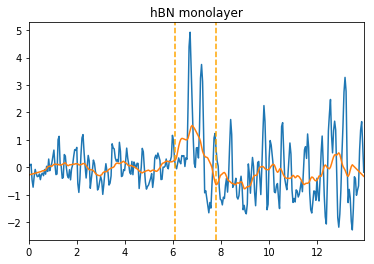

In [44]:
# Step pos dictates where the regression will be taken from 
step_low = 7.8
step_low_ind = np.where(np.round(x1,1)==np.round(step_low,1))[0][0]
step_high = 6.1
step_high_ind = np.where(np.round(x1,1)==np.round(step_high,1))[0][0]
plt.plot(x1,z1)
plt.axvline(step_low, linestyle='--', color='orange')
plt.axvline(step_high, linestyle='--', color='orange')
plt.xlim(0,np.max(x1))
z1_filt = sig.savgol_filter(z1, 23, 1)
plt.plot(x1, z1_filt)
plt.title('hBN monolayer')

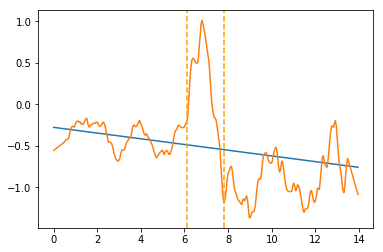

In [46]:
lin_bg = ((z1_filt[step_low_ind] - z1_filt[0])/(x1[step_low_ind] - x1[0]))*x1 + (z1_filt[0])
plt.plot(x1, lin_bg)
plt.plot(x1, z1_filt + lin_bg)
z1_corr = z1_filt +lin_bg
plt.axvline(step_high, linestyle='--', color='orange')
plt.axvline(step_low, linestyle='--', color='orange')


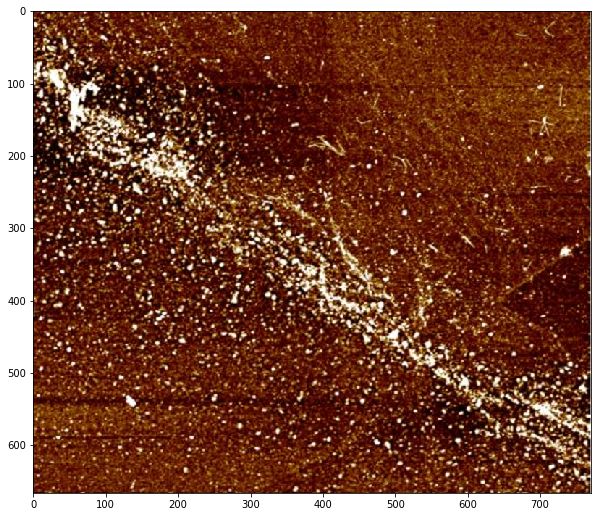

In [144]:
#Show the image to be dealt with
img = mpimg.imread('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Monolayer hBN spacer\\Trilayer image only.png')
fig = plt.figure(1, figsize=(10,10))

plt.imshow(img)

In [158]:
# Threshold the image and set pixel to given value 
len(img[0,:])
i=j=0
xpos_spike = []
ypos_spike = []
thresh = 2.7
dot_prod_mat = np.zeros(img.shape)
for j in range(len(img[:,0])):
    for i in range(len(img[j,:])):
        #Since white will represent high rgb values in the image we just need to find the threshold from the dot prod
        dot_prod = img[j,:][i][0]*img[j,:][i][0] + img[j,:][i][1]*img[j,:][i][1] + img[j,:][i][2]*img[j,:][i][2]
        #dot_prod_mat.append(dot_prod)
        if dot_prod > thresh:
            xpos_spike.append(j)
            ypos_spike.append(i)

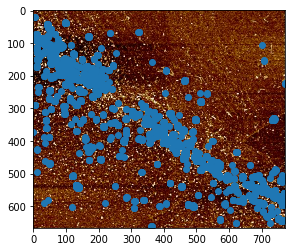

In [159]:
# Plot points above threshold in the image and take regression
plt.gca().invert_yaxis()
plt.scatter(ypos_spike, xpos_spike)
plt.imshow(img)

In [48]:
# Take step height as usual by taking mean of area either side of regression
step_mono = np.mean(z1_filt[0:step_high_ind]) - np.mean(z1_filt[step_low_ind:])
std_on_mono = np.std(z1_filt[0:step_high_ind])
std_off_mono = np.std(z1_filt[step_low_ind:])

In [49]:
step_mono

0.24139877259042097

In [50]:
std_on_mono

0.14773272215502917

In [51]:
std_off_mono

0.28992806461770476

Text(0.5,1,'hBN trilayer')

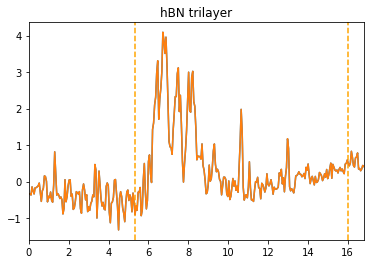

In [225]:
step_high = 16
step_high_ind = np.where(np.round(x2,1)==np.round(step_high,1))[0][0]
step_low = 5.3
step_low_ind = np.where(np.round(x2,1)==np.round(step_low,1))[0][0]
plt.plot(x2,z2)
plt.axvline(step_high, linestyle='--', color='orange')
plt.axvline(step_low, linestyle='--', color='orange')
plt.xlim(0,np.max(x2))
z2_filt = sig.savgol_filter(z2, 23,0)
z2_filt = z2
plt.plot(x2, z2_filt)
plt.title('hBN trilayer')

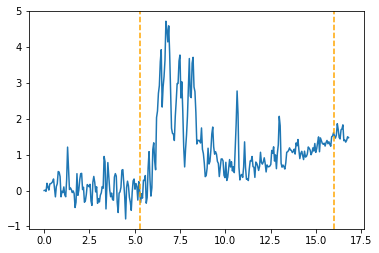

In [226]:
lin_bg = ((z2_filt[step_low_ind] - z2_filt[0])/(x2[step_low_ind] - x2[0]))*x2 + (z2_filt[0])
plt.plot(x2, z2_filt - lin_bg)
z2_corr = z2_filt - lin_bg
plt.axvline(step_high, linestyle='--', color='orange')
plt.axvline(step_low, linestyle='--', color='orange')
plt.savefig()

In [227]:
step_tri = (np.mean(z2_corr[0:step_cut_ind]) - np.mean(z2_corr[step_pos_ind:]))*-1
std_off_tri = np.std(z2[0:step_cut_ind])
std_on_tri = np.std(z2[step_pos_ind:])

#Step height using farthest point into hBN layer
step_tri_2 = np.round(z2_corr[len(z2_corr)-1] - z2_corr[step_low_ind], 2)

In [228]:
step_tri_2

1.47

In [229]:
std_off_tri

0.34084282382846115

In [230]:
np.round(std_on_tri, 2)

0.16

In [231]:
np.round(std_off_tri, 2)

0.34

Text(0.5,1,'hBN mort')

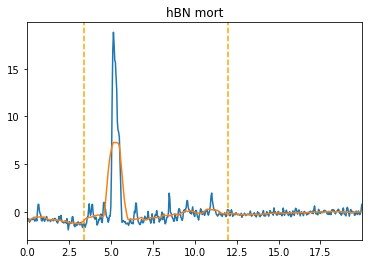

In [150]:
step_pos = 12
step_pos_ind = np.where(np.round(x3,1)==np.round(step_pos,1))[0][0]
step_cut = 3.4
step_cut_ind = np.where(np.round(x3,1)==np.round(step_cut,1))[0][0]
plt.plot(x3,z3)
plt.axvline(step_pos, linestyle='--', color='orange')
plt.axvline(step_cut, linestyle='--', color='orange')
plt.xlim(0,np.max(x3))
z3_filt = sig.savgol_filter(z3, 23, 1)
plt.plot(x3, z3_filt)
plt.title('hBN mort')

In [151]:
step_mort = z3_filt[step_cut_ind] - np.mean(z3_filt[step_pos_ind:])
std_on_mort = np.std(z3[0:step_cut_ind])
std_off_mort = np.std(z3[step_pos_ind:])

In [152]:
np.round(step_mort*-1, 2)

0.86

In [146]:
#Step height using averaging
np.round(step_tri, 2)

0.51

In [148]:
np.round(step_tri_2, 2)

0.98

In [149]:
np.round(step_mono, 2)

0.24

In [150]:
np.round(std_off_mono, 2)

1.12

In [151]:
np.round(std_on_mono,2)

0.47

In [152]:
np.round(std_off_tri, 2)

0.38

In [153]:
np.round(std_on_tri,2)

0.34